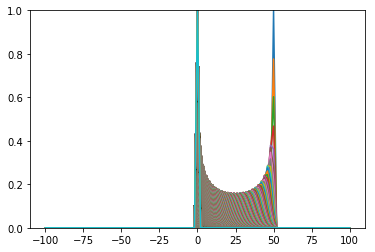

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
%matplotlib inline
from math import floor,ceil
import time

xs = np.linspace(-100,100,101)
ps = np.zeros(101)

dx = np.diff(xs)[1]

ps[75]=1

dt  = 0.001
lam = 1

def xDot(x):
    return -lam*x

def step():
    pNext = np.zeros(101)
    for x,p in zip(xs,ps):
        
        xNext = x+dt*xDot(x)
        if xNext>max(xs):
            b0=len(xs)-1
            b1=0
            u=0
        elif xNext<0:
            b0=0;
            b1=0;
            u=0;
        else:
            b1 = np.argmax(xs > xNext)
            b0 = b1-1;
            u  = (xNext-xs[b0])/dx
        
        pNext[b0]+=p*(1-u)
        pNext[b1]+=p*u
    ps[:]=pNext


fig,ax = plt.subplots()
ax.set_ylim(0,1)
for i in range(10000):
    if i%10==0:
        ax.plot(xs,ps)
    step()
plt.show()

